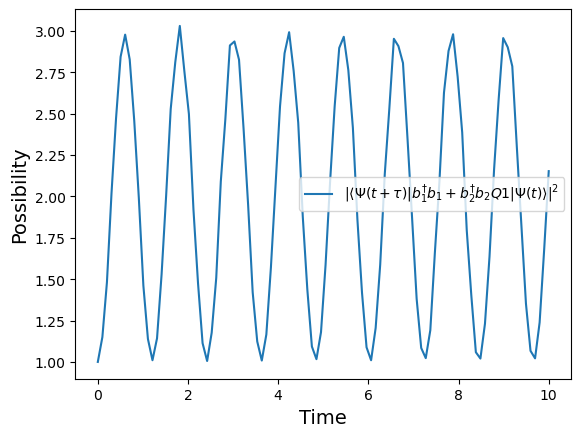

In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 8
b1 = destroy(N)  
# b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 1

# 定义系统的哈密顿量 H 和观测量 Q
# H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
# H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H =  omega*b1.dag()*b1+g_0*b1.dag()*b1*b1*b1+g_0*b1.dag()*b1.dag()*b1.dag()*b1  # 哈密顿量
# Q1 = b1.dag() * b1.dag() * b2.dag() * b2
# Q2 = b1.dag() * b1.dag() * b2 * b2.dag() 
# Q3 = b1.dag() * b1 * b2.dag() * b2.dag() 
# Q4 = b1 * b1.dag() * b2.dag() * b2.dag() 

# 定义时间范围和时间间隔
t_list1 = np.linspace(0, 10, 100) # 时间范围
# tau1 = 0.01  # 时间间隔
# times=[]

# psi0_1 = tensor(basis(N, 0), basis(N, 1)) 
psi0_1 = basis(N,1)

result = sesolve(H,psi0_1,t_list1,[b1.dag()*b1])

n=result.expect[0]
plt.figure()
# plt.plot(times, expectation_values_Q1, label=r'$\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2^{\dagger} b_2Q1|Ψ(t) \rangle$')
# plt.plot(times, expectation_values_Q2, label=r'$\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2 b_2^{\dagger}Q2|Ψ(t) \rangle$')
plt.plot(t_list1, n, label=r'$|\langleΨ(t+\tau)|b_1^{\dagger} b_1+ b_2^{\dagger} b_2Q1|Ψ(t) \rangle|^2$')
# plt.plot(times, possibility_Q2, label=r'$|\langleΨ(t+\tau)|b_1^{\dagger} b_1^{\dagger} b_2b_2^{\dagger}Q2|Ψ(t) \rangle|^2$')
plt.xlabel('Time',fontsize=14)
plt.ylabel('Possibility',fontsize=14)
plt.legend()
plt.show()